# Vektorisierung

In [3]:
import pandas as pd

Dataset "train_cleaned" importieren

In [4]:
df = pd.read_csv('../../../data/twitter_hate-speech/train_cleaned.csv', index_col=0)

In [5]:
pd.set_option('display.max_colwidth', None)

In [6]:
df.head()

,label,tweet,tweet_cleaned,user_handle,hashtags,emojis
id,,,,,,
1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,father selfish drag kid run,1,['#run'],NaN
2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thank lyft credit use cause offer van,2,"['#lyft', '#disapointed', '#getthanked']",NaN
3,0,bihday your majesty,bihday majesty,0,[],NaN
4,0,#model i love u take with u all the time in ur📱!!! 😙😎👄👅💦💦💦,model take time mobile phone kiss sunglass mouth tongue sweat droplet sweat droplet sweat droplet,0,['#model'],":mobile_phone:,:kissing_face_with_smiling_eyes:,:smiling_face_with_sunglasses:,:mouth:,:tongue:,:sweat_droplets:,:sweat_droplets:,:sweat_droplets:"
5,0,factsguide: society now #motivation,factsguide society motivation,0,['#motivation'],NaN


Da es leere tweet_cleaned gibt müssen diese hier entfernt werden. Ansonsten werfen alle 3 Methoden Fehler

In [7]:
df = df[df['tweet_cleaned'].notna()]

## Bag of Words

In [8]:
# Doku: https://scikit-learn.org/1.5/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer() # CountVectorizer(binary=True) würde nur 0 und 1 ausgeben
X_bow = vectorizer.fit_transform(df.tweet_cleaned)

In [9]:
print(vectorizer.get_feature_names())

['aamp', 'aap', 'ab', 'abandon', 'abasel', 'abba', 'abc', 'abe', 'ability', 'able', 'ableism', 'abroad', 'absolute', 'absolutely', 'abstract', 'abundance', 'abuse', 'ac', 'academy', 'acc', 'accent', 'accept', 'acceptable', 'acceptance', 'access', 'accessory', 'accident', 'accidentally', 'accomplish', 'accord', 'account', 'accountable', 'accuse', 'ace', 'ache', 'achieve', 'achievement', 'acknowledge', 'acoustic', 'acquire', 'across', 'act', 'action', 'active', 'activist', 'activity', 'actor', 'actorslife', 'actress', 'actual', 'actually', 'ad', 'adam', 'adapt', 'add', 'addict', 'addiction', 'addition', 'address', 'adele', 'adida', 'admin', 'administration', 'admire', 'admission', 'admit', 'adopt', 'adorable', 'adore', 'adrenaline', 'adult', 'adultery', 'advance', 'advanced', 'advantage', 'adve', 'adveise', 'adventure', 'advice', 'advise', 'advocate', 'af', 'affair', 'affect', 'affirmation', 'afford', 'afghan', 'afghanistan', 'afraid', 'africa', 'african', 'aft', 'afternoon', 'aftr', 'ag

C:\Users\svenw\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [10]:
print(X_bow.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [11]:
print(X_bow[1:10, :].toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [12]:
# Erster Test NB

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

y = df.label
clf = MultinomialNB()

clf.fit(X_bow,y)

ypred = clf.predict(X_bow)

print("Accuracy: ", accuracy_score(y, ypred))

Accuracy:  0.9523671742196824


## TF-IDF

In [13]:
# Doku https://scikit-learn.org/1.5/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
# https://scikit-learn.org/1.5/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html#sklearn.feature_extraction.text.TfidfTransformer

from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.feature_extraction.text import TfidfTransformer
#from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.pipeline import Pipeline

tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df.tweet_cleaned)

In [14]:
print(tfidf_vectorizer.get_feature_names_out())

['aamp' 'aap' 'ab' ... 'zootopia' 'zoro' 'zzz']


In [15]:
print(X_tfidf.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [16]:
print(X_tfidf[1:10, :].toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [17]:
# Erster Test NB

y = df.label
clf = MultinomialNB()

clf.fit(X_tfidf,y)

ypred_tfidf = clf.predict(X_tfidf)

print("Accuracy: ", accuracy_score(y, ypred_tfidf))

Accuracy:  0.954609569966364


## Word2Vec

In [18]:
from nltk import word_tokenize
from gensim.models import Word2Vec
import numpy as np

data = df['tweet_cleaned'].map(word_tokenize)

In [19]:
data

id
1                                                                                        [father, selfish, drag, kid, run]
2                                                                            [thank, lyft, credit, use, cause, offer, van]
3                                                                                                        [bihday, majesty]
4        [model, take, time, mobile, phone, kiss, sunglass, mouth, tongue, sweat, droplet, sweat, droplet, sweat, droplet]
5                                                                                        [factsguide, society, motivation]
                                                               ...                                                        
31956           [less, week, grin, sweat, fold, hand, medium, light, skin, tone, tropical, drink, sunglass, musical, note]
31957                                                                         [fishing, tomorrow, wait, first, time, year]
31958        

In [20]:
w2v = Word2Vec(data,window=4, min_count=1, sg=0) 
# sg=1: Skip-Gram
# sg=0: Continuous Bag of Words

In [21]:
w2v.train(data, total_examples=len(df['tweet_cleaned']), epochs=20)
# epochs = Anzahl Iterationen

(3895097, 4126720)

In [22]:
w2v.wv.most_similar(positive="motivation")

[('inspiration', 0.8485863208770752),
 ('positivity', 0.8422491550445557),
 ('inspirational', 0.7826069593429565),
 ('belief', 0.7778357863426208),
 ('bestseller', 0.7731046080589294),
 ('quoteoftheday', 0.7715201377868652),
 ('motivate', 0.7642614841461182),
 ('entrepreneur', 0.7620142698287964),
 ('positivevibe', 0.7525410056114197),
 ('personaldevelopment', 0.745742917060852)]

In [23]:
w2v.wv.most_similar(negative="motivation")

[('august', 0.3840394914150238),
 ('meet', 0.372098833322525),
 ('th', 0.3633401691913605),
 ('nd', 0.35128021240234375),
 ('poland', 0.3510764241218567),
 ('july', 0.34432145953178406),
 ('month', 0.3418499827384949),
 ('release', 0.3389836251735687),
 ('bus', 0.31656280159950256),
 ('st', 0.31564122438430786)]

In [24]:
size = 100

def w2v_vector(tokenized_tweet, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0
    for word in tokenized_tweet:
        try:
            vec += w2v.wv[word].reshape((1, size))
            count += 1
        except KeyError:
                         
            continue
    if count != 0:
        vec /= count
    return vec

In [25]:
X_w2v = np.zeros((len(data),size))


In [26]:
X_w2v

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [27]:
for i in range(len(data)):
    X_w2v[i,:] = w2v_vector(data.iloc[i],size)

In [28]:
X_w2v

array([[-3.29357201e-01,  2.17756808e-01, -2.77089285e-01, ...,
        -1.19399193e+00, -7.02326171e-01, -8.45288940e-01],
       [-3.13956378e-01,  5.64858994e-01,  1.90436269e-01, ...,
        -2.04246029e-01, -2.44822181e-01, -3.08859519e-01],
       [ 2.76411097e-01,  3.66098009e-01, -2.73467232e-01, ...,
        -5.61281733e-01,  2.34300740e-01,  1.45865239e-01],
       ...,
       [-4.86122499e-01, -5.98100297e-01,  1.00424451e+00, ...,
        -4.14842526e-01,  5.14115671e-01, -4.73215027e-01],
       [-3.12621886e-01,  5.46316600e-01,  1.50164807e-02, ...,
        -5.66651428e-02,  8.85430242e-02, -5.75304601e-05],
       [-4.41034614e-01,  3.75362651e-01, -9.60156725e-01, ...,
        -1.29378184e-01,  2.36968853e-01,  3.24059280e-01]])

In [29]:
w2v_df = pd.DataFrame(X_w2v)

In [30]:
w2v_df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.329357,0.217757,-0.277089,0.291411,0.056199,-0.172632,-0.225409,0.732860,-0.354993,0.297272,...,0.646247,0.427921,-0.863528,-0.082694,1.240059,0.171693,0.001358,-1.193992,-0.702326,-0.845289
1,-0.313956,0.564859,0.190436,-0.032094,0.015341,-0.569144,0.226574,0.403281,-0.321867,-0.005215,...,0.200564,0.201729,0.306558,-0.045786,0.494104,0.143066,-0.275315,-0.204246,-0.244822,-0.308860
2,0.276411,0.366098,-0.273467,0.240098,-0.345615,0.110493,-0.264393,0.112088,-0.754883,-0.015597,...,0.601578,0.662990,0.068360,0.287139,0.745132,0.426147,0.585183,-0.561282,0.234301,0.145865
3,-0.663725,-0.646820,-0.292164,0.159957,0.274615,-0.513955,0.097116,0.307241,-0.425676,-0.604685,...,1.052376,-0.158234,-0.101709,0.351500,-0.417841,0.500193,0.066254,-1.230985,0.260668,0.159519
4,-0.130047,-0.111398,0.036116,0.147852,0.619546,-0.429413,0.225801,0.552728,0.388987,0.077135,...,0.096539,-0.273116,0.200163,-0.061066,0.285272,0.101233,0.341155,-0.423273,-0.434901,-0.543742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27644,-0.607027,-0.968256,-0.508453,-0.139903,0.792452,-0.892431,-0.114379,0.736385,-0.765813,-0.904988,...,1.497874,-0.477710,0.432773,0.595385,-0.462689,0.206666,-0.246050,-0.755417,0.106584,-0.312945
27645,-0.752086,0.282614,-0.547923,-0.766089,-0.065111,-0.330547,-0.376419,0.511166,-0.113376,-1.214672,...,0.991705,0.488702,0.280115,-0.125532,1.065416,0.898269,-0.006038,-0.207843,0.692191,0.392191
27646,-0.486122,-0.598100,1.004245,-0.143436,0.427166,0.033156,0.133905,0.645393,-0.232468,-0.737874,...,0.354434,-0.210736,0.184505,-0.177555,0.351311,-0.048312,0.021292,-0.414843,0.514116,-0.473215
27647,-0.312622,0.546317,0.015016,0.081351,-0.032557,-0.101247,-0.033001,0.298287,-0.648716,-0.113771,...,0.319581,0.186879,0.027633,0.342122,0.537345,0.112331,0.032558,-0.056665,0.088543,-0.000058


[Text(0.5965302630098092, 0.9821428571428571, 'X[69] <= 0.111\ngini = 0.122\nsamples = 100.0%\nvalue = [0.935, 0.065]'),
 Text(0.3262343383076915, 0.9464285714285714, 'X[89] <= -0.027\ngini = 0.261\nsamples = 30.9%\nvalue = [0.845, 0.155]'),
 Text(0.1378625134264232, 0.9107142857142857, 'X[0] <= -0.164\ngini = 0.43\nsamples = 9.6%\nvalue = [0.687, 0.313]'),
 Text(0.06380657526168362, 0.875, 'X[95] <= 0.002\ngini = 0.289\nsamples = 4.5%\nvalue = [0.825, 0.175]'),
 Text(0.028541943093026684, 0.8392857142857143, 'X[84] <= -0.212\ngini = 0.41\nsamples = 1.6%\nvalue = [0.712, 0.288]'),
 Text(0.012602935911206588, 0.8035714285714286, 'X[59] <= -0.29\ngini = 0.476\nsamples = 0.7%\nvalue = [0.609, 0.391]'),
 Text(0.004313304269076052, 0.7678571428571429, 'X[57] <= 0.145\ngini = 0.34\nsamples = 0.1%\nvalue = [0.217, 0.783]'),
 Text(0.002156652134538026, 0.7321428571428571, 'X[22] <= 0.763\ngini = 0.105\nsamples = 0.1%\nvalue = [0.056, 0.944]'),
 Text(0.001078326067269013, 0.6964285714285714, 'g

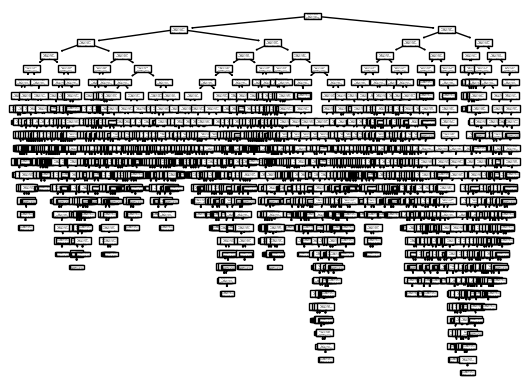

In [31]:
# Erster Test Entscheidungsbaum

from sklearn import tree


y = df.label
clf = tree.DecisionTreeClassifier().fit(X_w2v, y)

tree.plot_tree(clf,proportion='true')

In [32]:
# Erster Test NB
from sklearn.naive_bayes import GaussianNB

y = df.label
clf = GaussianNB()

clf.fit(X_w2v,y)

ypred_tfidf = clf.predict(X_w2v)

print("Accuracy: ", accuracy_score(y, ypred_tfidf))

Accuracy:  0.7600636551050671


## FastText

In [33]:
from gensim.models import FastText

In [34]:
ft = FastText(data, window = 5)

In [35]:
ft.train(data, total_examples=len(df['tweet_cleaned']), epochs=20)

(3788607, 4126720)

In [36]:
ft.wv.most_similar(positive="motivation")

[('mondaymotivation', 0.955443263053894),
 ('tuesdaymotivation', 0.9547462463378906),
 ('motivational', 0.9539207816123962),
 ('inspiration', 0.8647142648696899),
 ('meditation', 0.8322309255599976),
 ('innovation', 0.810245156288147),
 ('affirmation', 0.8101493716239929),
 ('motivated', 0.8096027374267578),
 ('motivate', 0.8010475039482117),
 ('transformation', 0.7949076294898987)]

In [37]:
ft.wv.most_similar(negative="motivation")

[('yr', 0.37263351678848267),
 ('hi', 0.36416253447532654),
 ('xbox', 0.3560031056404114),
 ('gator', 0.33380845189094543),
 ('snatch', 0.32559090852737427),
 ('prime', 0.32423096895217896),
 ('die', 0.3180796504020691),
 ('six', 0.31772270798683167),
 ('driver', 0.3152710497379303),
 ('stephen', 0.3137125074863434)]

In [38]:
size = 100

def ft_vector(tokenized_tweet, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0
    for word in tokenized_tweet:
        try:
            vec += ft.wv[word].reshape((1, size))
            count += 1
        except KeyError: 
                         
            continue
    if count != 0:
        vec /= count
    return vec

In [39]:
X_ft = np.zeros((len(data),size))

In [40]:
X_ft

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [41]:
for i in range(len(data)):
    X_ft[i,:] = ft_vector(data.iloc[i],size)

In [42]:
X_ft

array([[-9.68144464e-01, -2.84111446e-01, -3.44326650e-01, ...,
        -6.57796463e-01, -3.65284842e-01,  1.68937423e-01],
       [-6.42561166e-01,  2.83675667e-04, -1.74646146e-01, ...,
         1.79462885e-01,  5.61334306e-01,  8.73677496e-02],
       [ 1.02745860e+00,  4.51273859e-01,  1.64566807e-01, ...,
        -1.22582205e+00, -5.87414006e-01, -2.54583448e-01],
       ...,
       [-1.55221243e-01, -7.21201139e-01, -8.48841727e-01, ...,
        -1.11856552e+00,  2.64426832e-01, -4.56688985e-01],
       [ 3.90140083e-02,  3.30208304e-02, -2.14743509e-01, ...,
        -2.00996853e-01,  4.21602918e-01,  2.09608199e-01],
       [-3.50978105e-01, -3.06861544e-01, -7.49340410e-01, ...,
        -4.14468733e-01, -3.02170924e-01, -1.38742554e-01]])

In [43]:
ft_df = pd.DataFrame(X_ft)

In [44]:
ft_df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.968144,-0.284111,-0.344327,-0.275619,0.191102,0.368251,0.115871,-0.322835,-0.806896,-0.245847,...,-0.637181,-0.757910,-0.488673,-0.685299,1.014319,-0.168664,-0.504186,-0.657796,-0.365285,0.168937
1,-0.642561,0.000284,-0.174646,0.513665,0.226788,0.275778,-0.227854,0.058301,0.713828,-0.332487,...,-0.160968,-0.470799,-0.419553,0.104455,-0.167112,0.257966,0.205409,0.179463,0.561334,0.087368
2,1.027459,0.451274,0.164567,0.554590,-0.083285,0.672239,1.082205,-1.207897,-0.180126,-0.593887,...,0.910174,1.145289,-0.073381,0.101688,-0.903269,-0.622834,-0.648012,-1.225822,-0.587414,-0.254583
3,-0.690317,-0.111469,-0.102173,0.105128,-0.179859,-0.512262,-0.281625,-0.222884,-0.604724,-0.325727,...,-0.065095,-0.176841,-0.213963,-0.609518,-0.194138,-0.434362,-0.035412,-2.171546,0.710934,-0.637418
4,-1.304808,0.598190,-0.283711,0.945491,-0.497603,0.607170,0.037604,-0.461683,0.061989,-0.738795,...,-0.634736,0.191376,-0.246458,0.261042,-1.174170,0.176733,-0.014438,-0.161926,0.288689,0.358547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27644,0.592662,0.616687,0.591953,0.069401,-0.242337,-0.843613,-1.194670,-1.129131,-0.531726,0.171788,...,0.531629,-0.313918,-0.958255,-0.579290,-0.211209,-1.238185,-0.174461,-2.200701,1.388007,-0.313105
27645,0.517114,-0.484860,-0.311380,-0.094483,0.853474,0.093195,0.415885,0.928782,0.091780,-0.039934,...,0.164333,0.489053,-0.066576,-0.503790,0.472312,-0.011419,0.126828,-1.174881,0.314085,0.135250
27646,-0.155221,-0.721201,-0.848842,-0.198532,0.600509,0.101029,0.830272,-0.037609,-0.063277,-0.506735,...,-0.457173,-0.444333,0.007064,-1.643506,0.239369,0.140960,0.351929,-1.118566,0.264427,-0.456689
27647,0.039014,0.033021,-0.214744,0.177910,-0.163098,0.201795,0.385924,0.315472,0.235259,-0.577487,...,-0.496079,0.011081,0.029998,-0.173611,-0.072861,-0.098169,0.364204,-0.200997,0.421603,0.209608


[Text(0.48369317084834845, 0.9821428571428571, 'X[70] <= -0.088\ngini = 0.122\nsamples = 100.0%\nvalue = [0.935, 0.065]'),
 Text(0.25988133412206904, 0.9464285714285714, 'X[13] <= -0.007\ngini = 0.295\nsamples = 23.4%\nvalue = [0.82, 0.18]'),
 Text(0.13648896741132402, 0.9107142857142857, 'X[23] <= -0.404\ngini = 0.435\nsamples = 8.9%\nvalue = [0.681, 0.319]'),
 Text(0.05860609071184713, 0.875, 'X[32] <= 0.186\ngini = 0.499\nsamples = 3.7%\nvalue = [0.523, 0.477]'),
 Text(0.014916190248580128, 0.8392857142857143, 'X[40] <= 0.607\ngini = 0.392\nsamples = 1.0%\nvalue = [0.732, 0.268]'),
 Text(0.0049299272855476695, 0.8035714285714286, 'X[4] <= -0.946\ngini = 0.217\nsamples = 0.5%\nvalue = [0.876, 0.124]'),
 Text(0.0020225342709939156, 0.7678571428571429, 'X[57] <= -1.23\ngini = 0.375\nsamples = 0.0%\nvalue = [0.25, 0.75]'),
 Text(0.0010112671354969578, 0.7321428571428571, 'gini = 0.0\nsamples = 0.0%\nvalue = [1.0, 0.0]'),
 Text(0.0030338014064908735, 0.7321428571428571, 'gini = 0.0\nsamp

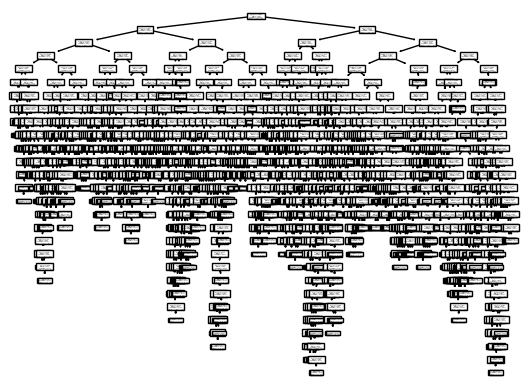

In [45]:
# Erster Test Entscheidungsbaum
from sklearn import tree

y = df.label
clf = tree.DecisionTreeClassifier().fit(X_ft, y)

tree.plot_tree(clf,proportion='true')

In [46]:
# Erster Test NB
from sklearn.naive_bayes import GaussianNB

y = df.label
clf = GaussianNB()

clf.fit(X_ft,y)

ypred_tfidf = clf.predict(X_ft)

print("Accuracy: ", accuracy_score(y, ypred_tfidf))

Accuracy:  0.7599551520850664
